<a href="https://colab.research.google.com/github/BrianMohamadSafiudin/uts-machine-learning-ti3f/blob/main/UTS_BrianMohamadSafiudin_TI3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nama      : Brian Mohamad Safiudin
# No. Absen : 10
# NIM       : 2141720133
# Kelas     : TI - 3F

---
# **UTS Machine Learning**
---

# Segmentasi Gambar dengan Clustering

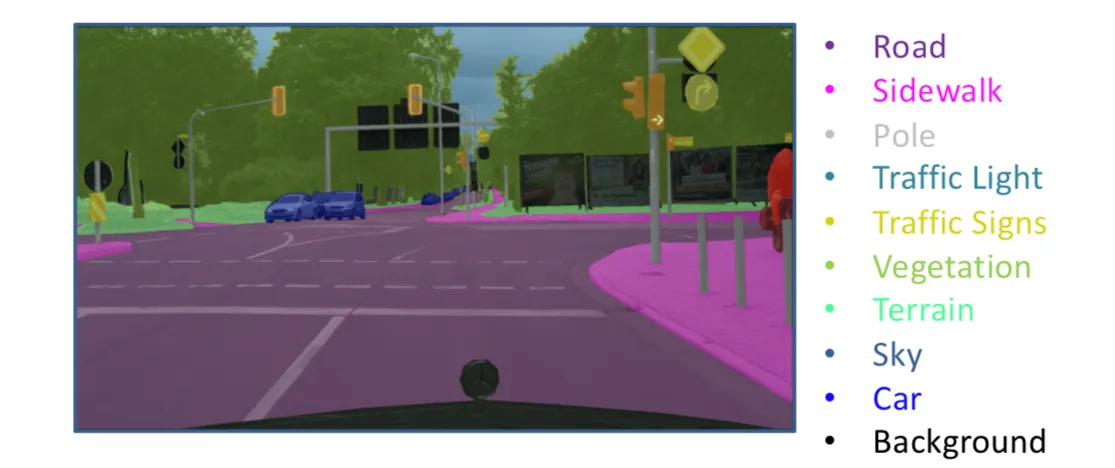

Segmentasi merupakan salah satu cara untuk membedakan antara objek satu dengan objek lainnya dalam suatu citra. Cara ini dapat dilakukan dengan mengelompokkan nilai pixel citra berdasarkan kedekatan warnanya.

Pada UTS kali ini, Anda diminta untuk melakukan segmentasi citra plat nomor kendaraan di Indonesia. Fungsi segmentasi dalam kasus ini adalah mempermudah pembacaan plat nomor kendaraan sebelum proses selanjutnya, seperti pembacaan karakter pada plat nomor.

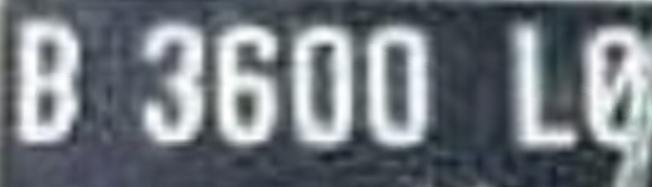

# Ketentuan UTS

Berdasarkan pemaparan kasus, Anda diminta untuk,

1. Pilih 5 citra plat nomor untuk setiap anggota kelompok dari dataset yang telah disediakan. [DOWNLOAD](https://storage.googleapis.com/kuliah_mah/dummy.zip)
2. Lakukan segmentasi pada citra plat nomor untuk memperjelas karakter pada plat nomor.
3. Anda dapat menggunakan algortima K-Means seperti yang telah dijelaskan pada praktikum sebelumnya atau menggunakan algoritma klasterisasi yang lain.
4. Anda diperkenankan untuk melakukan pra pengolahan data (preprocessing) pada citra seperti,
    - Merubah color space
    - Reduksi dimensi
    - dsb
5. Tampilkan perbandingan citra antara sebelum dan sesudah di segmentasi

**Open Challange** (Opsional)
 - Bagaimana cara melakukan evaluasi pada hasil segementasi?
 - Terapkan pada kasus ini!


**Catatan:**
1. Proses loading citra dicontohkan dengan menggunakan library openCV
2. Secara default, openCV akan memuat citra dalam format BGR

---
# **Import Data Dummy**
---

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from sklearn.cluster import KMeans

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


---
# **1. Pilih 5 citra plat nomor**
---

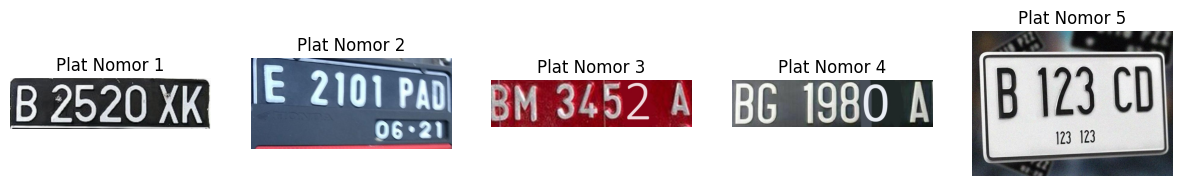

In [3]:
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    return image

def display_images_side_by_side(images, titles):
    num_images = len(images)
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i in range(num_images):
        axes[i].imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        axes[i].set_title(titles[i])
        axes[i].axis('off')
    plt.show()

image_paths = [
    '/content/drive/MyDrive/dummy/B2520XK_PNG.rf.4e22939a8917f509074397176d67c5e5.jpg',
    '/content/drive/MyDrive/dummy/25-E-2101-PAD-06-21_jpeg.rf.fb688472f5ba9c0c445f9d9330f39508.jpg',
    '/content/drive/MyDrive/dummy/BM3452A_PNG.rf.0f77ba0375f050d4cdd9b8a36c7ab92b.jpg',
    '/content/drive/MyDrive/dummy/BG1980A_png.rf.0144d9ab803a1ef7c66fad4c8178699f.jpg',
    '/content/drive/MyDrive/dummy/019_jpg.rf.e73938ec62074bbde822f7d5a084bdef.jpg'
]

titles = [f'Plat Nomor {i+1}' for i in range(len(image_paths))]
images = [preprocess_image(path) for path in image_paths]
display_images_side_by_side(images, titles)

---
# **2. Lakukan Segmentasi**
---

In [4]:
def kmeans_segmentation(image, k=2):
    height, width, channels = image.shape
    pixels = image.reshape(-1, channels)
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pixels)
    segmented_pixels = kmeans.cluster_centers_[kmeans.labels_].reshape((height, width, channels)).astype(np.uint8)
    return segmented_pixels

---
# **3. Algoritma K-Means**
---

In [5]:
images = [preprocess_image(path) for path in image_paths]
k = 2  # Klustering
segmented_images = [kmeans_segmentation(image, k) for image in images]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

---
# **4. a. Merubah Color Space**
---

In [6]:
img = cv2.imread('/content/drive/MyDrive/dummy/22-E-5234-YF-11-20_jpeg.rf.4e1ab567405d90ef53329797f1f6dab5.jpg')
h, w, ch= img.shape
data = img / 255.0
data = data.reshape(h * w, ch)
data.shape
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))

    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

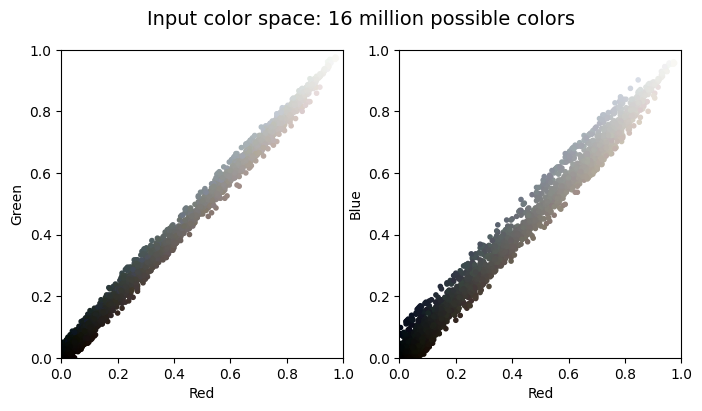

In [7]:
plot_pixels(data, title='Input color space: 16 million possible colors')

---
# **4. b. Reduksi Dimensi**
---

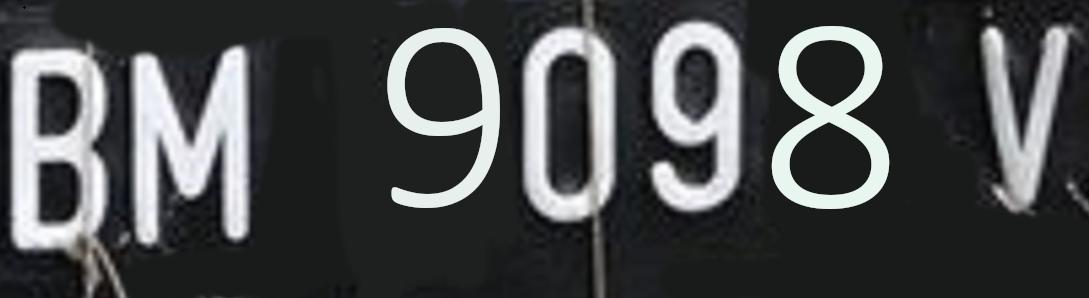

Original Image


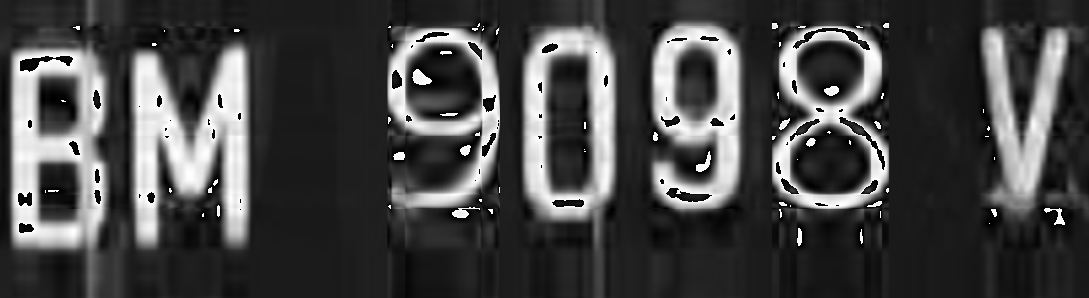

Picture That Dimension has been reducted!!


In [8]:
import cv2
import numpy as np
from sklearn.decomposition import PCA
from google.colab.patches import cv2_imshow  # Import cv2_imshow for Colab

# Baca gambar asli menggunakan OpenCV
original_image = cv2.imread('/content/drive/MyDrive/dummy/BM9098V_PNG.rf.36b28183ada2d698e331cfffcfe2f1d0.jpg')

# Periksa apakah gambar berhasil dimuat
if original_image is not None:
    # Konversi gambar ke Grayscale
    grayscale_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

    # Buat objek PCA dengan jumlah komponen yang diinginkan (misalnya, 10)
    n_components = 10  # Ganti sesuai kebutuhan
    pca = PCA(n_components=n_components)

    # Terapkan PCA ke data gambar
    reduced_image = pca.fit_transform(grayscale_image)

    # Kembalikan data ke bentuk asli
    reconstructed_image = pca.inverse_transform(reduced_image)

    # Ubah kembali ke bentuk gambar
    reco_image = reconstructed_image.astype(np.uint8)

    # Tampilkan gambar asli
    cv2_imshow(original_image)
    print("Original Image")

    # Tampilkan gambar yang telah di-reduksi dimensinya
    cv2_imshow(cv2.cvtColor(reco_image, cv2.COLOR_GRAY2BGR))
    print("Picture That Dimension has been reducted!!")
else:
    print("Fail to read Picture!!.")

---
# **5. Perbandingan Citra Sebelum dan Sesudah Segmentasi**
---

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

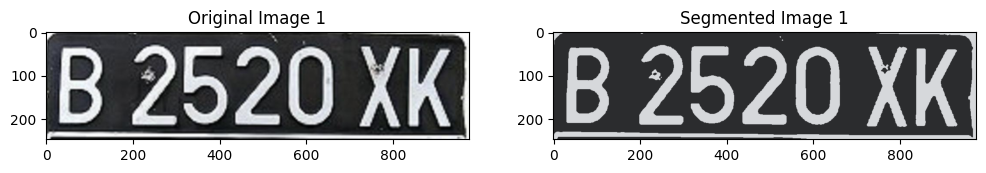

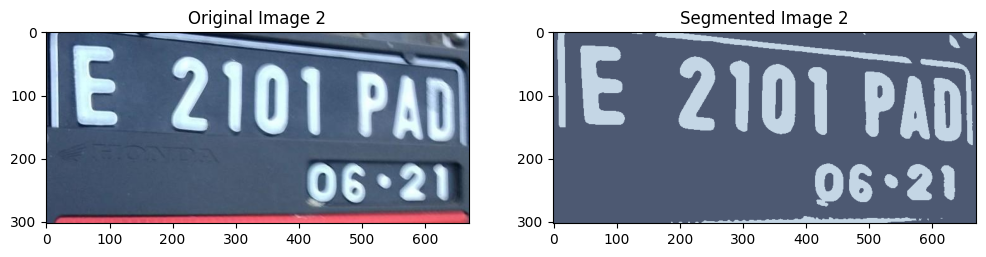

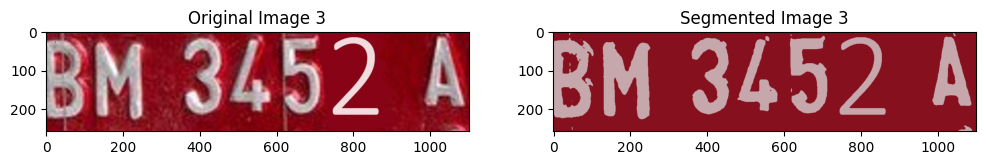

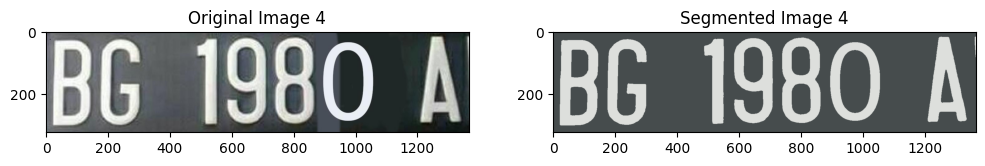

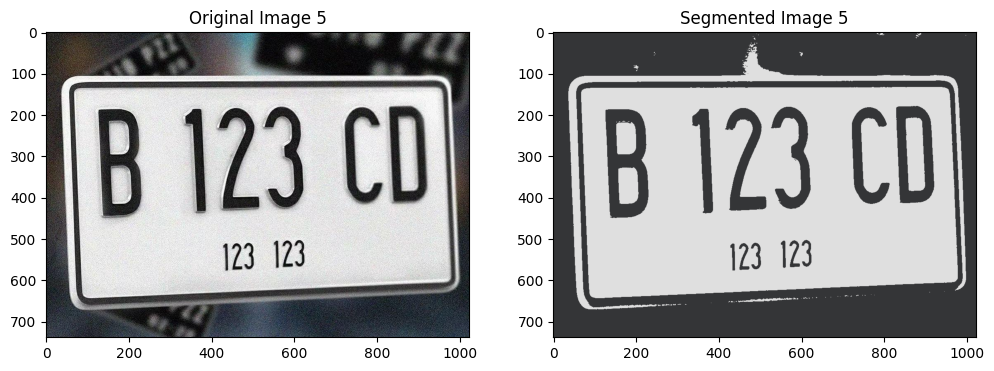

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def preprocess_image(image_path):
    image = cv2.imread(image_path)
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    return image, blurred

def kmeans_segmentation(image, k=2):
    height, width, channels = image.shape
    pixels = image.reshape(-1, channels)
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pixels)
    segmented_pixels = kmeans.cluster_centers_[kmeans.labels_].reshape((height, width, channels)).astype(np.uint8)
    return segmented_pixels

def display_images(original_image, segmented_image, title1, title2):
    plt.figure(figsize=(12, 6))
    plt.subplot(121), plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)), plt.title(title1)
    plt.subplot(122), plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB)), plt.title(title2)
    plt.show()

image_paths = [
    '/content/drive/MyDrive/dummy/B2520XK_PNG.rf.4e22939a8917f509074397176d67c5e5.jpg',
    '/content/drive/MyDrive/dummy/25-E-2101-PAD-06-21_jpeg.rf.fb688472f5ba9c0c445f9d9330f39508.jpg',
    '/content/drive/MyDrive/dummy/BM3452A_PNG.rf.0f77ba0375f050d4cdd9b8a36c7ab92b.jpg',
    '/content/drive/MyDrive/dummy/BG1980A_png.rf.0144d9ab803a1ef7c66fad4c8178699f.jpg',
    '/content/drive/MyDrive/dummy/019_jpg.rf.e73938ec62074bbde822f7d5a084bdef.jpg'
]

images = [preprocess_image(path) for path in image_paths]
k = 2  # Klustering
segmented_images = [kmeans_segmentation(image, k) for _, image in images]

for i in range(len(image_paths)):
    display_images(images[i][0], segmented_images[i], f'Original Image {i+1}', f'Segmented Image {i+1}')

---
# **Open Challenge**
---
Bagaimana cara melakukan evaluasi pada hasil segementasi?

**Terdapat beberapa metrik evaluasi yang dapat digunakan, implementasi dari salah satu metrik tersebut, yaitu indeks Silhouette. Skor Silhouette adalah alat yang digunakan untuk mengukur sejauh mana hasil segmentasi berhasil. Metrik ini membantu mengevaluasi seberapa baik algoritma segmentasi berfungsi dalam memisahkan objek dalam gambar.**

In [10]:
from sklearn.metrics import silhouette_score

# Fungsi untuk menghitung indeks Silhouette
def calculate_silhouette_score(segmented_image, k):
    height, width, channels = segmented_image.shape
    pixels = segmented_image.reshape(-1, channels)
    labels = KMeans(n_clusters=k).fit_predict(pixels)
    silhouette_avg = silhouette_score(pixels, labels)
    return silhouette_avg

# Evaluasi setiap gambar yang telah segmentasi
for i in range(len(image_paths)):
    silhouette_avg = calculate_silhouette_score(segmented_images[i], k)
    print(f'Silhouette Score for Segmented Image {i+1}: {silhouette_avg:.2f}')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for Segmented Image 1: 1.00


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for Segmented Image 2: 1.00


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for Segmented Image 3: 1.00


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for Segmented Image 4: 1.00


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for Segmented Image 5: 1.00
